In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
test1DF =pd.read_excel('Reflux_data/병합/SH_merge/Final_merge_test1.xlsx',index_col=0)
#test1DF.reset_index(inplace=True)
test1DF

,ZONE,FLUD_DPWT,SLOPE_AVG,HIGH,HOUR_RAINFALL,PRECI_HH,DIST,PUMP_RATIO,IMP_SUR_RATIO,MANHOLES_RATIO
ADM_CD,,,,,,,,,,
2647000000,연제구,0.0,1.0,3.66,2.1,1,0,4.115226e-07,62.32,0.016387
2647000000,연제구,0.0,1.0,3.66,5.1,2,0,4.115226e-07,62.32,0.016387
2647000000,연제구,0.0,1.0,3.66,10.6,3,0,4.115226e-07,62.32,0.016387
2647000000,연제구,0.0,1.0,3.66,8.0,4,0,4.115226e-07,62.32,0.016387
2647000000,연제구,0.0,1.0,3.66,9.1,5,0,4.115226e-07,62.32,0.016387
...,...,...,...,...,...,...,...,...,...,...
2671000000,기장군,0.0,4.5,5.32,0.0,20,0,1.364381e-08,7.70,0.001618
2671000000,기장군,0.0,4.5,5.32,0.0,21,0,1.364381e-08,7.70,0.001618
2671000000,기장군,0.0,4.5,5.32,0.0,22,0,1.364381e-08,7.70,0.001618


In [ ]:
manholeDF =pd.read_excel('Manhole_count1.xlsx')
manholeDF

In [ ]:
## 해당 칼럼값을 원하는 단어만 출력하기
#busan_pump['zone'] = busan_pump['DETAIL_ADM'].apply(lambda b : b.split(' ')[1])

In [ ]:
# 리스트로 변환
ADM_CD=list(np.array(manholeDF['ADM_CD'].tolist()))

In [ ]:
# 컬럼 삭제
manholeDF.drop(['n2','manholes_count','zone_area(m^2)'],axis=1,inplace=True)

In [ ]:
# 두개의 데이터 병합
merger_data= pd.merge(floodDF,manholeDF,on='ADM_CD_4')
merger_data

In [50]:
test2=test1DF[test1DF['HOUR_RAINFALL'] >=10]

In [51]:
# 범위 선정
test2.quantile([0.25,0.5,0.75])

,FLUD_DPWT,SLOPE_AVG,HIGH,HOUR_RAINFALL,PRECI_HH,DIST,PUMP_RATIO,IMP_SUR_RATIO,MANHOLES_RATIO
0.25,0.00,1.0,2.94,16.5,9.0,0.0,3.042751e-08,27.63,0.016387
0.50,0.00,4.5,3.92,36.0,10.0,0.0,1.509054e-07,40.23,0.016808
0.75,0.37,4.5,6.67,53.0,15.0,1.0,2.399520e-07,61.44,0.017684


In [40]:
# 각 변수간의 상관관계를 확인
df_corr1=test2.corr()
print(df_corr1)

                FLUD_DPWT  SLOPE_AVG      HIGH  HOUR_RAINFALL  PRECI_HH  \
FLUD_DPWT        1.000000   0.022097  0.051744       0.558841  0.227450   
SLOPE_AVG        0.022097   1.000000  0.717433       0.042037 -0.045636   
HIGH             0.051744   0.717433  1.000000       0.116545  0.156528   
HOUR_RAINFALL    0.558841   0.042037  0.116545       1.000000  0.142155   
PRECI_HH         0.227450  -0.045636  0.156528       0.142155  1.000000   
DIST             0.870421   0.001417  0.028120       0.565975  0.197871   
PUMP_RATIO      -0.072294  -0.191067 -0.157403      -0.079503 -0.021723   
IMP_SUR_RATIO   -0.168472  -0.247425 -0.362050      -0.115829 -0.185389   
MANHOLES_RATIO  -0.217600  -0.030229 -0.155111      -0.095844 -0.178324   

                    DIST  PUMP_RATIO  IMP_SUR_RATIO  MANHOLES_RATIO  
FLUD_DPWT       0.870421   -0.072294      -0.168472       -0.217600  
SLOPE_AVG       0.001417   -0.191067      -0.247425       -0.030229  
HIGH            0.028120   -0.157403   

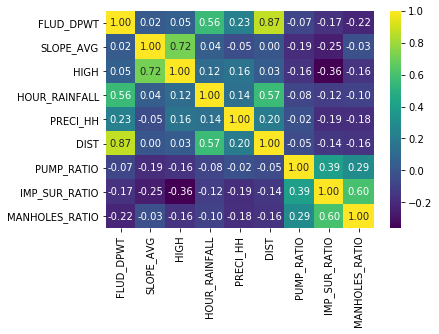

In [41]:
sns.heatmap(df_corr1, annot=True, fmt='.2f', cmap='viridis')
plt.show()